# B

(500, 800, 3)
(829, 949, 4)


c:\Users\LMAL304\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


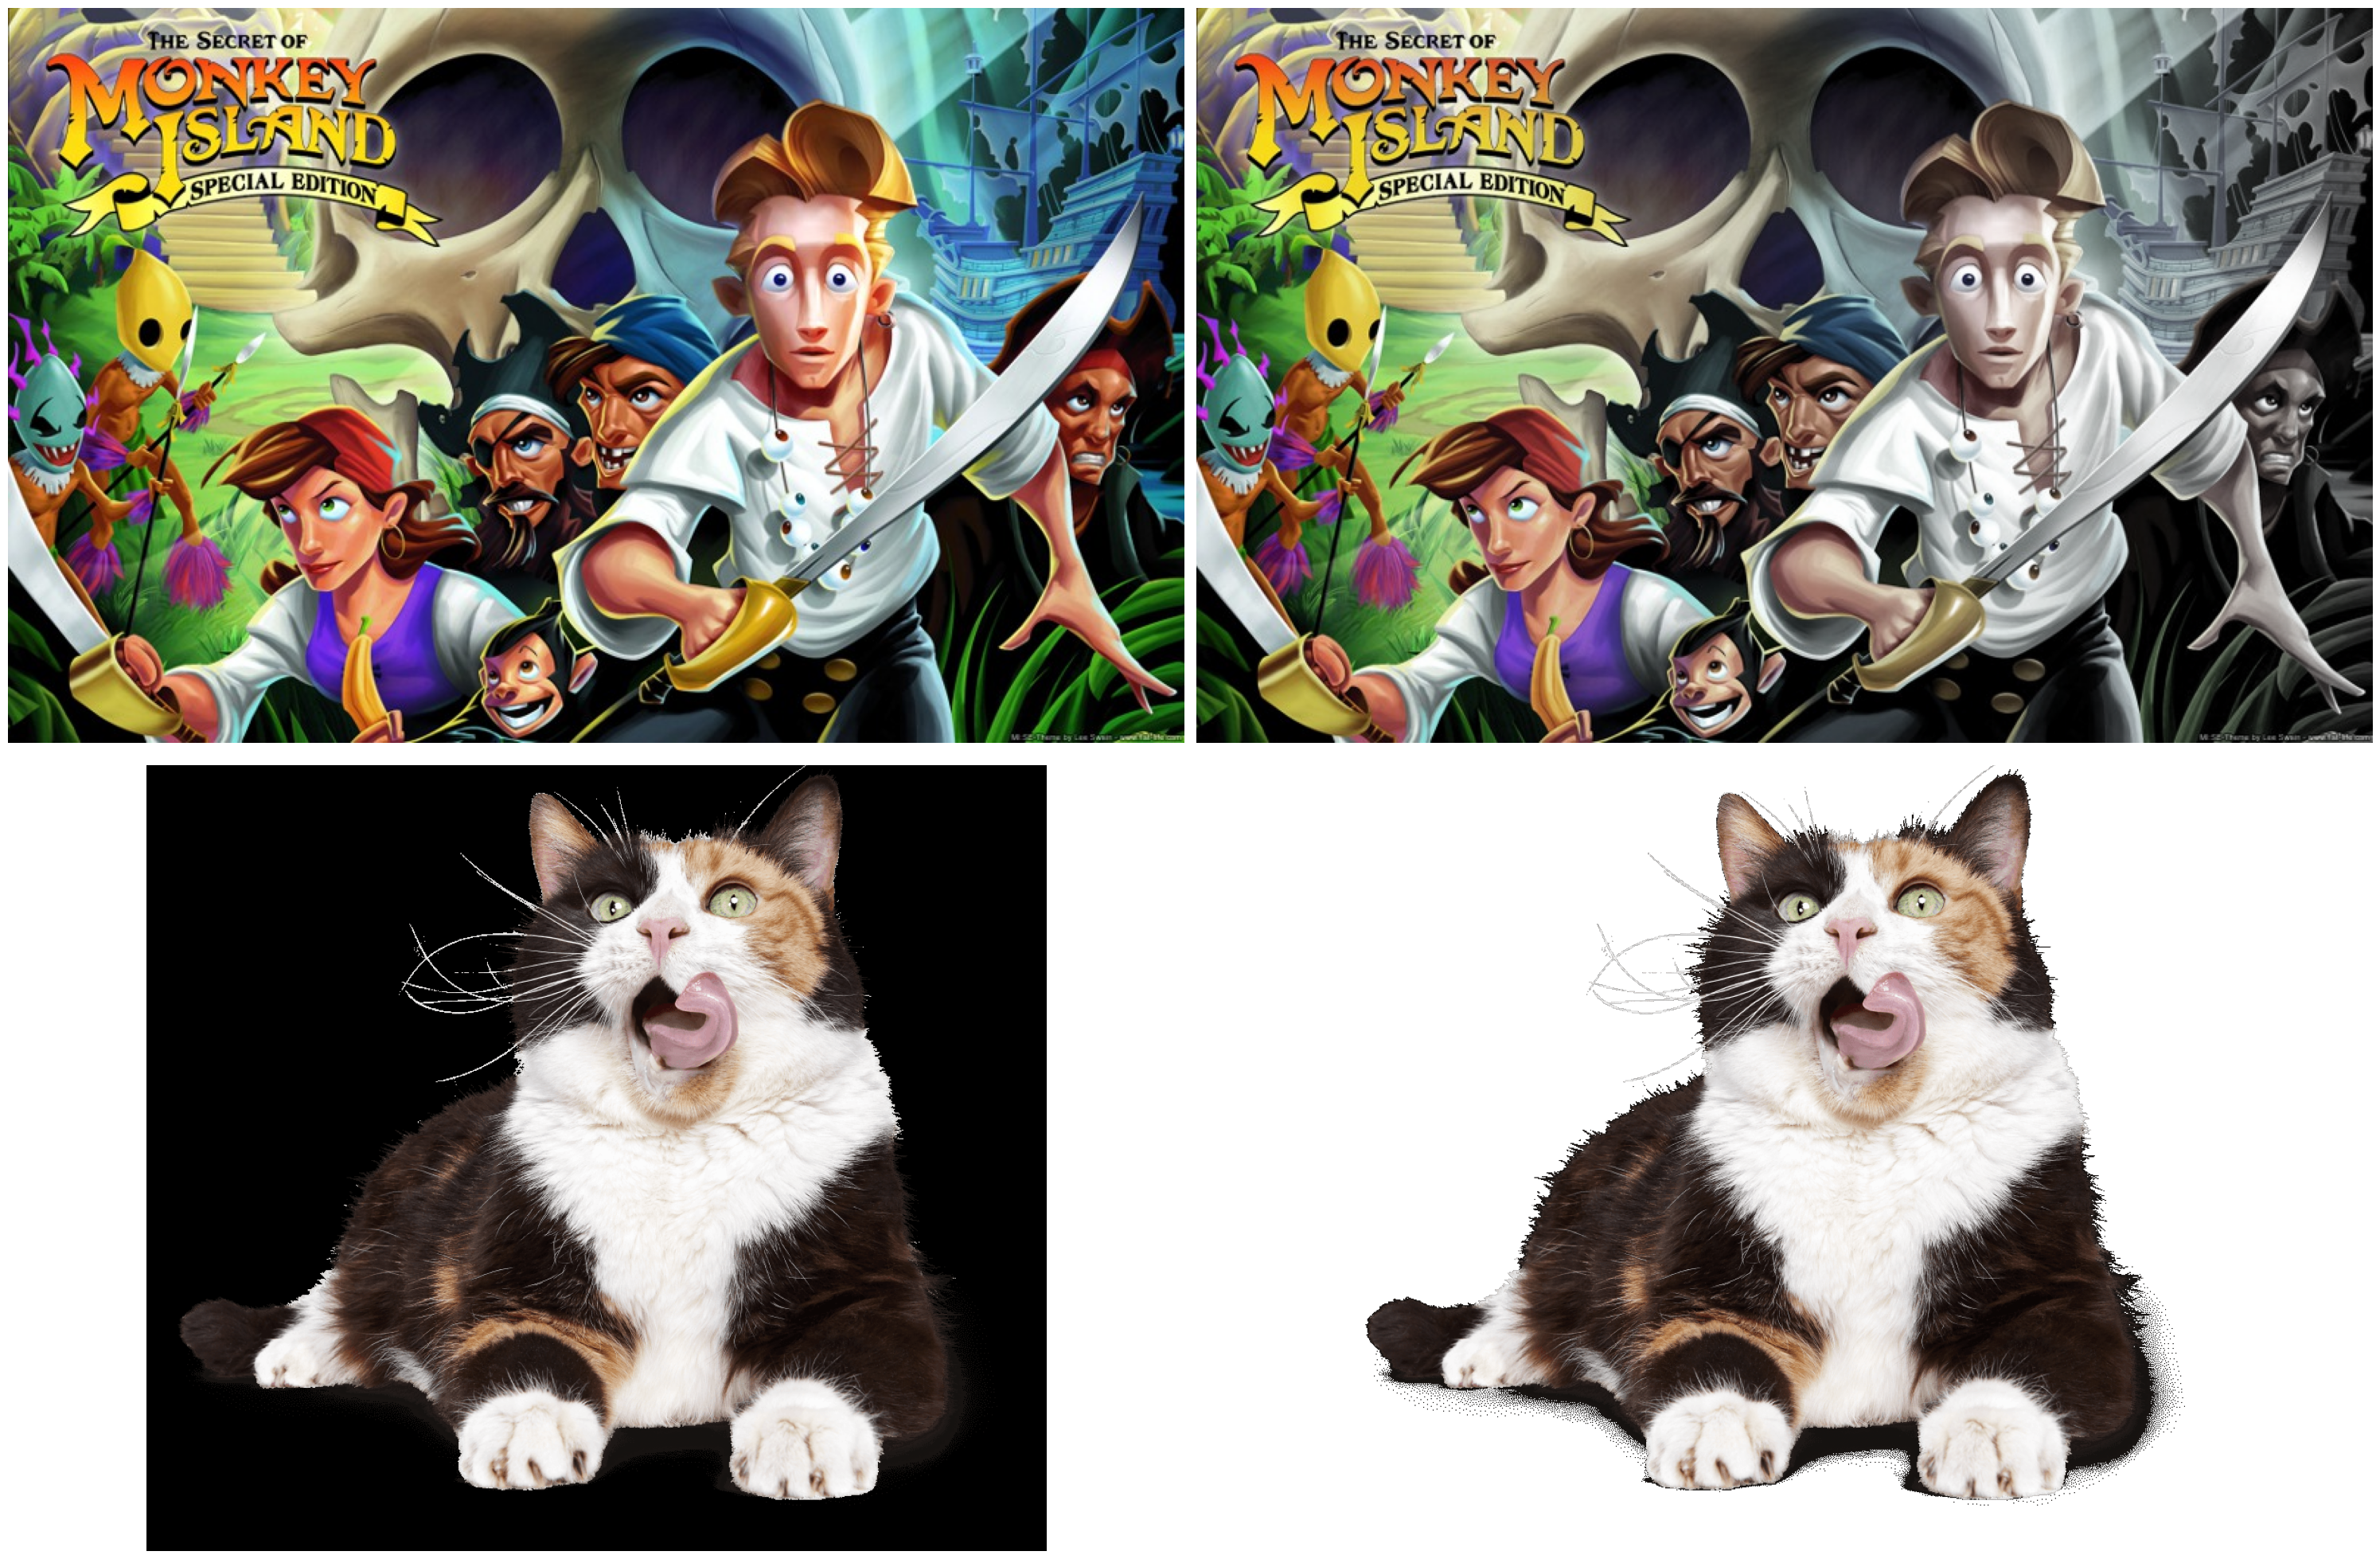

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io


# Do NOT modifify the function names

def fade_gradually(img):
    processed = img.copy()
    # TODO_B1
    height, width, channels = processed.shape 
    for i in range(width):
        for j in range(height):
            gray = 1/3 * processed[j, i, 0] + 1/3 * processed[j, i, 1] + 1/3 * processed[j, i, 2]
            processed[j, i, :]  = (1-i/width)*processed[j, i, :] + (i/width)*gray
    return processed  
    # for i in range(width):
    #     for j in range(height):
    #         for c in range(channels):
    #             # Gradually reduce color intensity towards grayscale
    #             processed[j, i, c] = processed[j, i, c] * (1 - i / width)    
    # return processed
def image_matting(img):
    processed = img.copy()
    # TODO_B2
    gray = skimage.color.rgb2gray(processed)
    foreground = gray > 0.005
    height, width, channels = processed.shape
    processed = np.zeros((height, width, 4), dtype=np.uint8)
    processed[foreground, :3] = img[foreground, :3]
    processed[foreground, 3] = 255

    return processed

def my_resize(img, height, width):
    
    # TODO_B3

    return

# You are incouraged to test your program in the main function

def main():
    monkey_island = io.imread('monkey_island.jpg')
    fade_monkey_island = fade_gradually(monkey_island)
    f ,ax = plt.subplots(2 , 2 , figsize = (30,20))
    ax[0, 0].imshow(monkey_island)
    ax[0, 0].axis('off')
    ax[0, 1].imshow(fade_monkey_island)
    ax[0, 1].axis('off')
    print(fade_monkey_island.shape)
    
    cat = io.imread('cat.png')
    mat_cat = image_matting(cat)
    ax[1, 0].imshow(cat)
    ax[1, 0].axis('off')
    ax[1,1].imshow(mat_cat)
    ax[1, 1].axis('off')
    print(mat_cat.shape)
    f.tight_layout()

    pass

    
if __name__ == "__main__":
    main()

# C

(20, 20)
(829, 949)


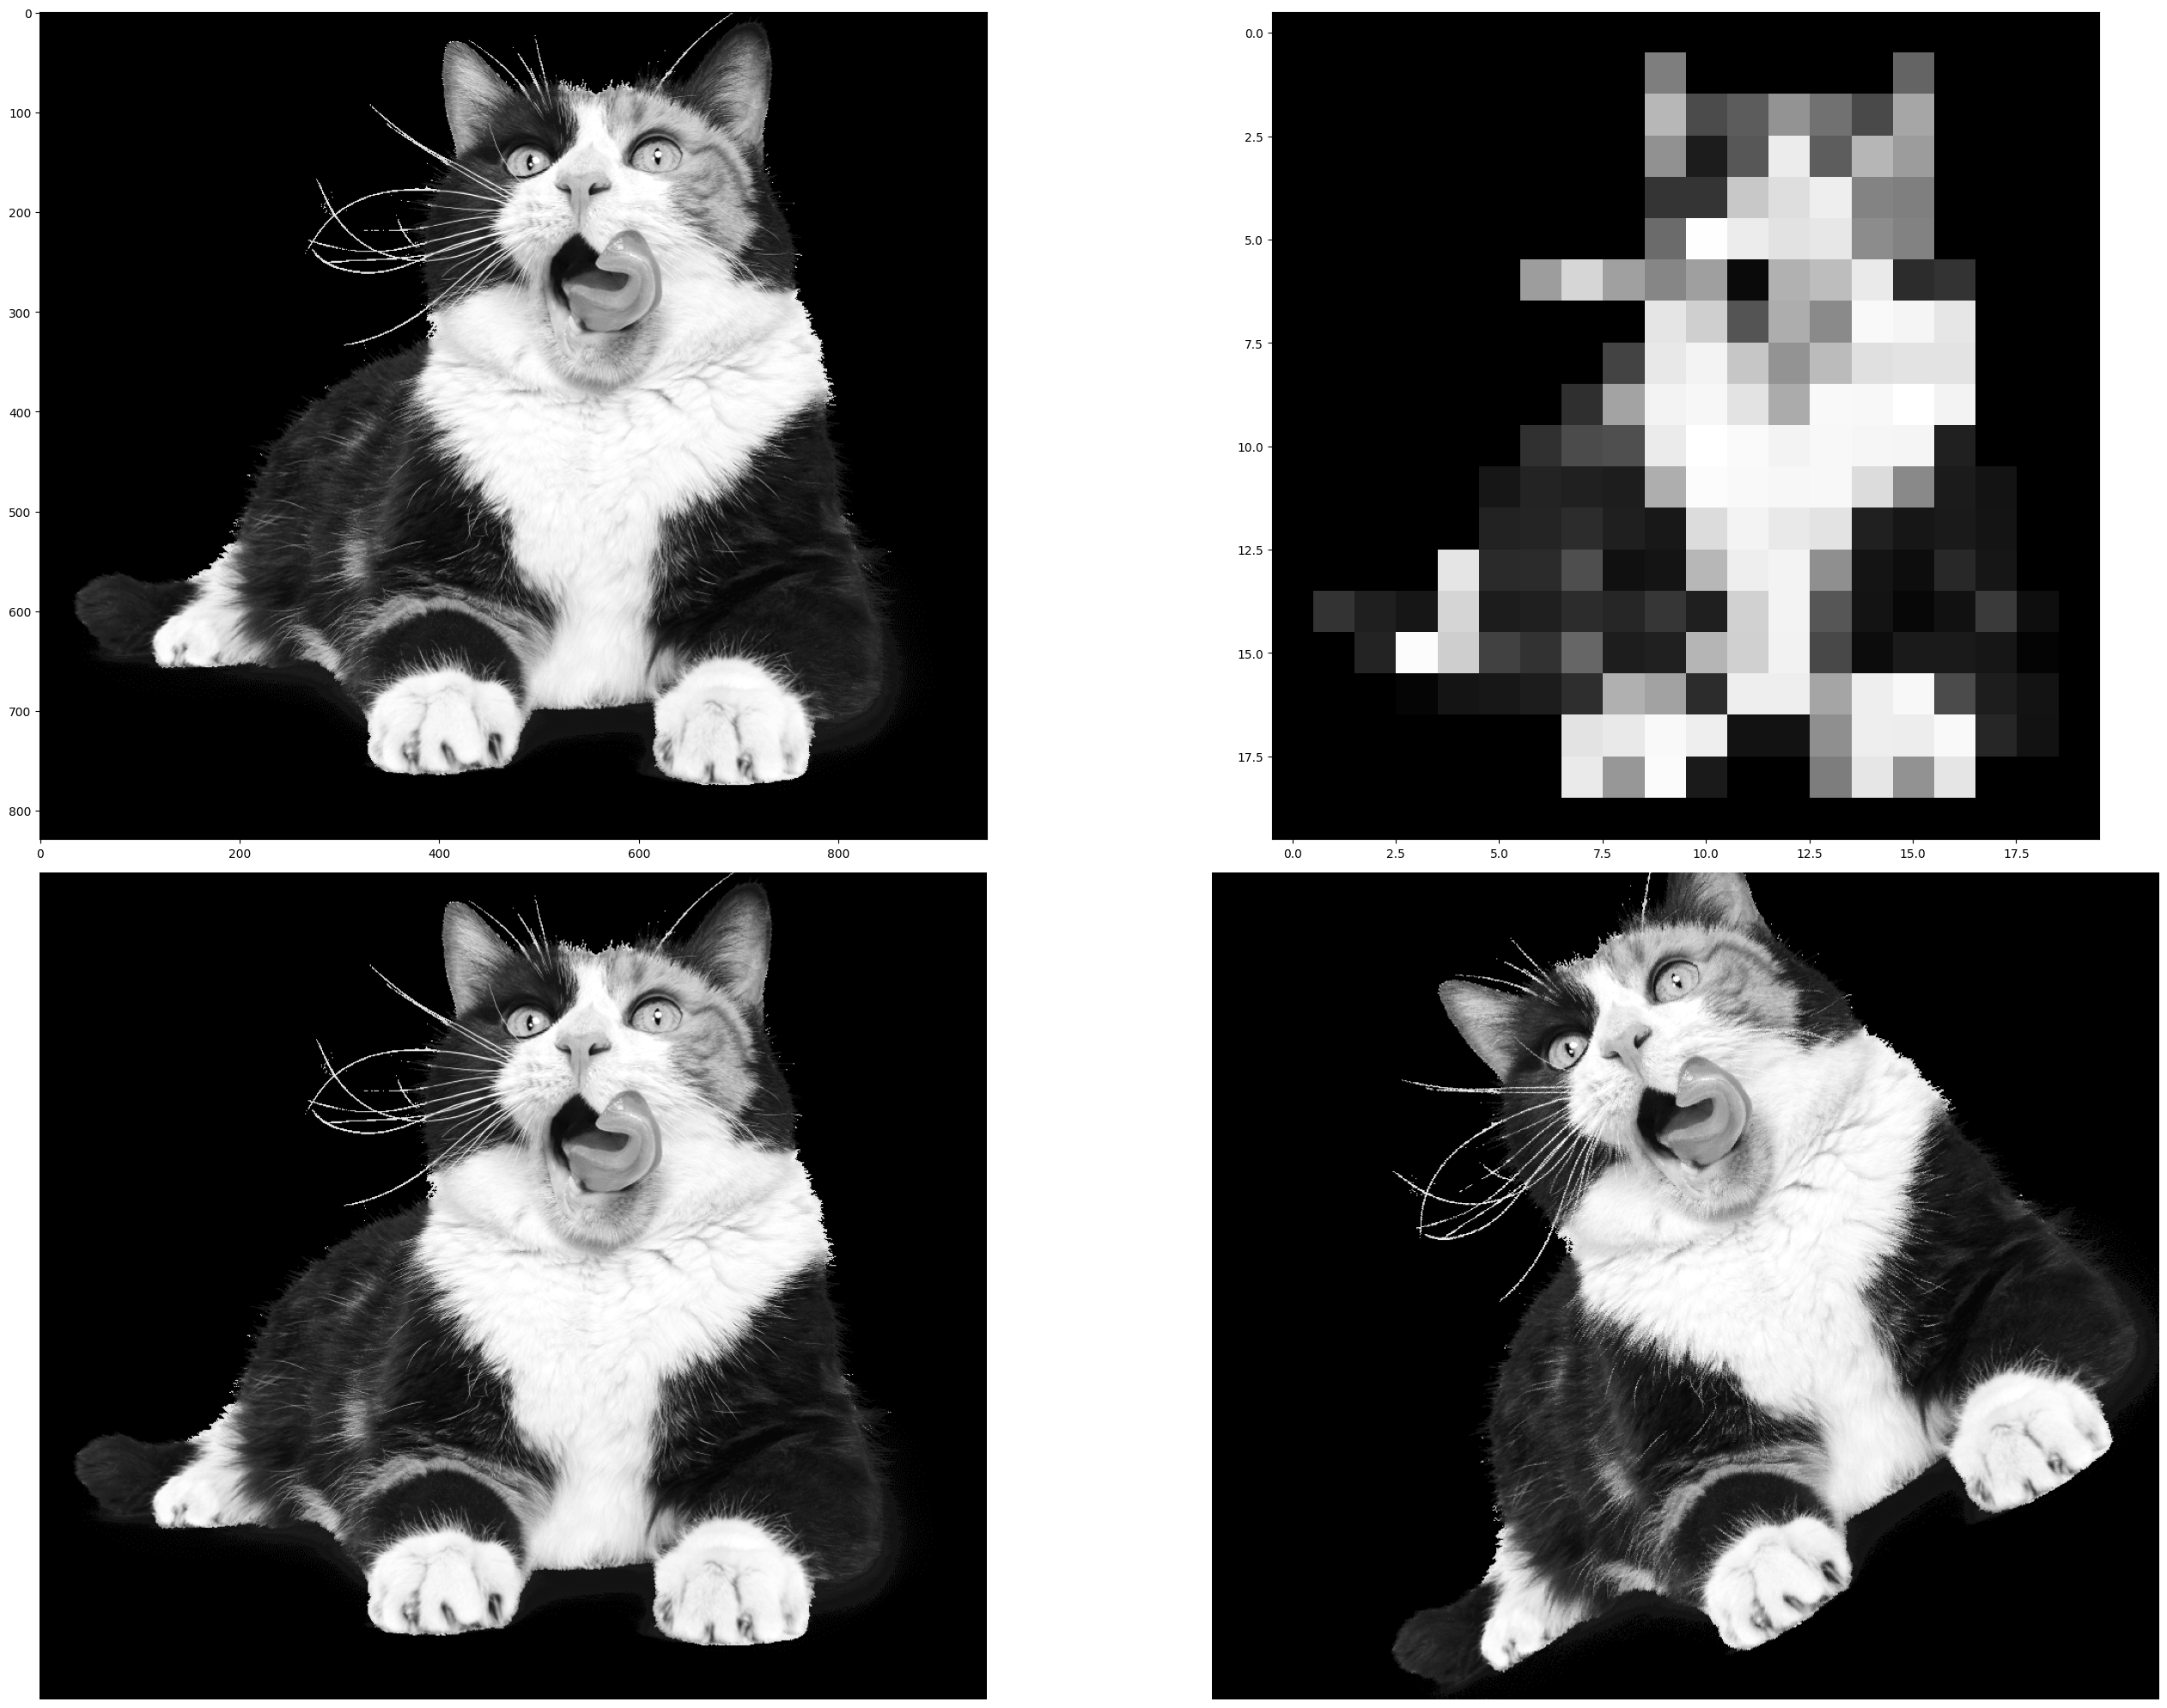

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io


# Do NOT modifify the function names


def my_resize(img, height, width):
    # TODO_C1
    new_h, new_w = np.meshgrid(np.arange(height), np.arange(width), indexing="ij")
    new_h = new_h * img.shape[0] / height
    new_w = new_w * img.shape[1] / width
    h_int = (new_h).astype(int)
    w_int = (new_w).astype(int)
    u = new_h - h_int
    v = new_w - w_int
    # Prevent crossing
    h_int = np.clip(h_int, 0, img.shape[0] - 2)
    w_int = np.clip(w_int, 0, img.shape[1] - 2)
    top_left = img[h_int, w_int]
    top_right = img[h_int, w_int + 1]
    down_left = img[h_int + 1, w_int]
    down_right = img[h_int + 1, w_int + 1]
    new_img = (
        (1 - u) * (1 - v) * top_left
        + (1 - v) * u * down_left
        + v * (1 - u) * top_right
        + u * v * down_right
    )
    return new_img


def my_rotation(img, angle):
    # TODO_C2
    theta = np.radians(angle)
    new_height = int(np.clip(img.shape[0] * np.sqrt(2), 0, img.shape[0]))
    new_width = int(np.clip(img.shape[1] * np.sqrt(2), 0, img.shape[1]))
    rotate_img = np.zeros((new_height, new_width))
    for i in range(new_height):
        for j in range(new_width):
            y = (
                (i - new_height / 2) * np.cos(theta)
                + (j - new_width / 2) * np.sin(theta)
                + img.shape[0] / 2
            )
            x = (
                -(i - new_height / 2) * np.sin(theta)
                + (j - new_width / 2) * np.cos(theta)
                + img.shape[1] / 2
            )
            if 0 <= y < img.shape[0] and 0 <= x < img.shape[1]:
                rotate_img[i, j] = img[int(y), int(x)]
    return rotate_img


# You are incouraged to test your program in the main function


def main():
    cat = io.imread("cat.png", as_gray=True)
    re = my_resize(cat, 20, 20)
    print(re.shape)
    ro = my_rotation(cat, 30)
    print(ro.shape)

    f, ax = plt.subplots(2, 2, figsize=(30, 20))
    ax[0, 0].imshow(cat, cmap="gray")
    ax[0, 1].imshow(re, cmap="gray")

    ax[1, 0].imshow(cat, cmap="gray")
    ax[1, 0].axis("off")
    ax[1, 1].imshow(ro, cmap="gray")
    ax[1, 1].axis("off")
    f.tight_layout()

    plt.show()
    pass


if __name__ == "__main__":
    main()